# 0 必要的packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import mglearn

# 1 KNN 

In [2]:
# import sample dataset
X,y = mglearn.datasets.make_forge()


# 使用train_test_split function 生成training dataset 和 test dataset
# X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size, random_state, shuffle)
    # train_data:          X values
    # train_target:        Y values
    # test_size=0.25:      % 选择split 的比例，默认25%用于test
    # random_state:        随机抽取obs的random seed
    # shuffle=True：       True-打乱dataset的顺序， False-不打乱
    # 返回一个tuple: 训练用X，测试用X； 训练用y，测试用y
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# 使用sklearn.neighbors.KNeighborsClassifier类来做KNN
from sklearn.neighbors import KNeighborsClassifier

# 将KNeighborsClassifier类实例化——声明利用最近的3个neighbors来做判断
clf = KNeighborsClassifier(n_neighbors=3)

# fit the model,返回一个训练之后的model （返回自身）
clf.fit(X_train, y_train)

# 使用model.predict(X_test)来预测
y_predicted = clf.predict(X_test)
print(y_predicted)
print("\n")

# 使用model.score(X_test, y_test)来measure model的预测准确率
clf_score = clf.score(X_test, y_test)
print(f" KNN accuracy is {round(clf_score*100,2)}%")


[1 0 1 0 1 0 0]


 KNN accuracy is 85.71%


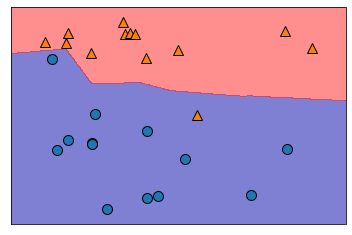

In [15]:
# 查看decision boundary
mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=0.5)   # draw the decision boundary
mglearn.discrete_scatter(X[:,0],X[:,1],y)


### 看不同的neighbor数量对于decision boundary的影响

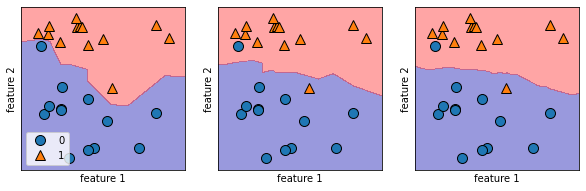

In [20]:
### 使用plt.subplots来绘制使用[1,3,9]个neighbors的KNN的决策边界
# fig, axs = plt.subplot(row, col, figsize, sharex=False, sharey=False)
# fig：包含全部subplots的整个画板object
# axs: 由一个一个subplot构成的集合，通过loop可以遍历每一个subplot
# row: 一行有几个subplot
# col: 一列有几个subplot
# figsize: fig的大小
# sharex: ['all','none','row','col']
#         all: all subplots will share the same X-axis
#         none: each subplot's X-axis is independent
#         row: each row shares the same X-axis
#         col: each col shares the same X-axis
# sharey:['all','none','row','col']
#        针对Y-axis,用法与sharex相同

fig, axs = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axs):  
    # zip函数将多个iterable objects 依次提取第x个元素组成一个list of tuples,可以用list(zip())访问结果
    # ex： zip([1,2,3], [a,b,c]) → [(1,a), (2,b), (3,c)]
    # 可以用多个iterators来访问每个tuple中的元素
    # 本例中，zip()将KNN的参数与fig中对应的subplot整理为一个tuple, 然后用n_neighbors 访问KNN参数，用ax访问subplot
    clf_n = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf_n, X, fill=True, eps=0.5, ax=ax, alpha=0.4) # 绘制decision boundary
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)                                # 绘制scatter plot
    # 为每个subplot绘制xlabel 与 ylabel
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")
    
axs[0].legend(loc=3)

### 用breast cancer数据集看一下model complexity 与 model generalization ability之间的关系

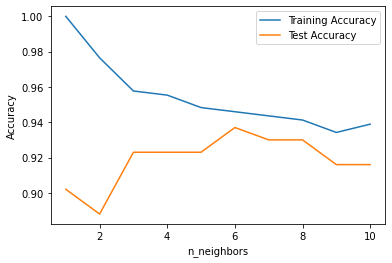

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# cancer.keys() = ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']

# split into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=66)

# variable to store training accuracy and test accuracy
train_acc = []
test_acc = []

# KNN(1~11)
for n_neighbors in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train, y_train)
    train_acc.append(KNN.score(X_train, y_train))
    test_acc.append(KNN.score(X_test,y_test))
    
# draw the performance line-chart
plt.plot(range(1,11), train_acc, label='Training Accuracy')
plt.plot(range(1,11), test_acc, label='Test Accuracy')
plt.xlabel("n_neighbors")
plt.ylabel('Accuracy')
plt.legend()
    

# 2. KNN regression

### 2.1 Model setting

In [47]:
from sklearn.neighbors import KNeighborsRegressor

# import "wave" dataset
X, y = mglearn.datasets.make_wave(n_samples = 40)

# dataset splitting 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,  
                                                    random_state=0)

# model: KNeighborsRegressor(n_neighbors)声明用附近的n个来做prediction
KNNreg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

# KNNreg.score 用R^2来衡量Model的performance
print(KNNreg.score(X_train, y_train))
print(KNNreg.score(X_test, y_test))


0.8194343929538755
0.8344172446249605


### 2.2 KNNreg的分析

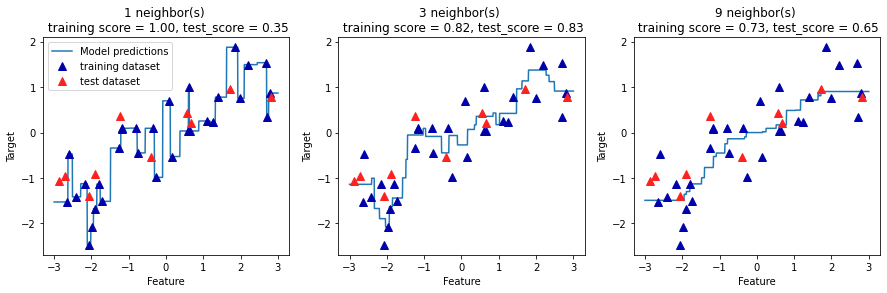

In [59]:
# 同样，设置KNN(1), KNN(3), KNN(9) 的 performance

fig, axs = plt.subplots(1,3,figsize=(15,4))

# 使用np.linespace作为X-axis来绘制Model prediction （note:KNNreg针对的是continous data）
# np.linespace(min, max, No.Points) 生成[min, max]之间均匀分布的No.Points个点
# 使用reshape(row,col)将np.linspace的行向量转为列向量，因为model只接受列向量作为输入值
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9],axs):
    # run the model
    KNNreg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train,y_train)
    # plot the model
    ax.plot(line, KNNreg.predict(line))
    # plot the scatter of Training dataset
    ax.plot(X_train, y_train, '^',c=mglearn.cm2(0), markersize=8)
    # plot the scatter of Test dataset
    ax.plot(X_test, y_test, '^',c=mglearn.cm2(1), markersize=8)
    # set the title of subplot
    ax.set_title(f"{n_neighbors} neighbor(s) \n training score = {KNNreg.score(X_train, y_train):.2f}, test_score = {KNNreg.score(X_test, y_test):.2f}")
    # set labels
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    # set legend
    axs[0].legend(["Model predictions","training dataset","test dataset"])
    